#Problem 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [4]:
#reading the data
data = pd.read_csv('/content/wine_flag_all.csv')

**checking for missing values**

In [6]:
#checking for missing values
print(data.isnull().sum())

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


**Label Encoding**

In [7]:
#label encoding
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Alcohol_flag'] = label_encoder.fit_transform(data['Alcohol_flag'])
data['Sugar_flag'] = label_encoder.fit_transform(data['Sugar_flag'])

>After encoding we now have for Type: Red = 0, White = 1. For Alcohol and Sugar: High = 0, Low = 1

**Creating contingency tables**

In [11]:
contingency_table_alcohol = pd.crosstab(data['Type'], data['Alcohol_flag'])
contingency_table_sugar = pd.crosstab(data['Type'], data['Sugar_flag'])


In [12]:
# Display the contingency table for Type vs. Alcohol content
print("Contingency Table for Type vs. Alcohol content:\n", contingency_table_alcohol)

# Display the contingency table for Type vs. Sugar content
print("\nContingency Table for Type vs. Sugar content:\n", contingency_table_sugar)


Contingency Table for Type vs. Alcohol content:
 Alcohol_flag     0     1
Type                    
0              485   600
1             1176  1084

Contingency Table for Type vs. Sugar content:
 Sugar_flag     0    1
Type                 
0            237  848
1           1382  878


**Plotting Cross Tabulations**

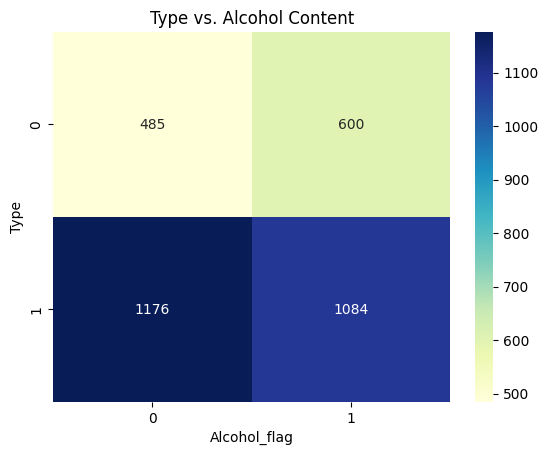

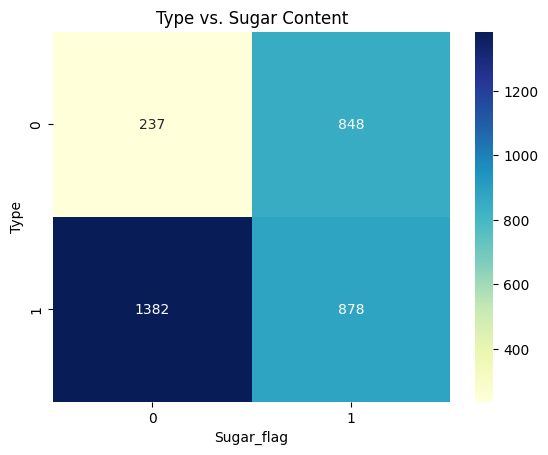

In [13]:
# Plot cross tabulations
sns.heatmap(contingency_table_alcohol, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Type vs. Alcohol Content')
plt.show()

sns.heatmap(contingency_table_sugar, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Type vs. Sugar Content')
plt.show()

>Color Coding:

Each cell in the heatmap represents a count of observations falling into a particular combination of categories.
The color intensity (shades of blue in this case) represents the count. Darker shades typically indicate higher counts.

> Interpretation:

You can examine how the counts are distributed across different categories. For instance, in "Type vs. Alcohol Content," you can see how many instances of each Type (Red or White) fall into the categories of high and low alcohol content.
Similarly, in "Type vs. Sugar Content," you can observe the distribution of Type across different sugar content categories.

**Probabilities**

In [14]:
#Calculate probabilities
prior_prob_red = len(data[data['Type'] == 1]) / len(data)
prior_prob_white = 1 - prior_prob_red

prob_high_alcohol = data['Alcohol_flag'].sum() / len(data)
prob_low_alcohol = 1 - prob_high_alcohol

prob_high_sugar = data['Sugar_flag'].sum() / len(data)
prob_low_sugar = 1 - prob_high_sugar

cond_prob_alcohol_red = contingency_table_alcohol.loc[1, 1] / contingency_table_alcohol.loc[1].sum()
cond_prob_low_alcohol_red = 1 - cond_prob_alcohol_red

cond_prob_sugar_red = contingency_table_sugar.loc[1, 1] / contingency_table_sugar.loc[1].sum()
cond_prob_low_sugar_red = 1 - cond_prob_sugar_red

In [15]:
# Print probabilities
print(f"\nPrior Probability of Type = Red: {prior_prob_red:.2f}")
print(f"Prior Probability of Type = White: {prior_prob_white:.2f}\n")

print(f"Probability of High Alcohol Content: {prob_high_alcohol:.2f}")
print(f"Probability of Low Alcohol Content: {prob_low_alcohol:.2f}\n")

print(f"Probability of High Sugar Content: {prob_high_sugar:.2f}")
print(f"Probability of Low Sugar Content: {prob_low_sugar:.2f}\n")

print(f"Conditional Probability of High Alcohol given Type = Red: {cond_prob_alcohol_red:.2f}")
print(f"Conditional Probability of Low Alcohol given Type = Red: {cond_prob_low_alcohol_red:.2f}\n")

print(f"Conditional Probability of High Sugar given Type = Red: {cond_prob_sugar_red:.2f}")
print(f"Conditional Probability of Low Sugar given Type = Red: {cond_prob_low_sugar_red:.2f}\n")


Prior Probability of Type = Red: 0.68
Prior Probability of Type = White: 0.32

Probability of High Alcohol Content: 0.50
Probability of Low Alcohol Content: 0.50

Probability of High Sugar Content: 0.52
Probability of Low Sugar Content: 0.48

Conditional Probability of High Alcohol given Type = Red: 0.48
Conditional Probability of Low Alcohol given Type = Red: 0.52

Conditional Probability of High Sugar given Type = Red: 0.39
Conditional Probability of Low Sugar given Type = Red: 0.61



**NB Classifiers/Shuffling and Stratifying data**

In [17]:
# Create NB classifiers and record accuracy
X = data[['Alcohol_flag', 'Sugar_flag']]
y = data['Type']

In [18]:
# Set up training/test ratios
ratios = [0.8, 0.75, 0.7, 0.6, 0.5]
accuracies = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ratio), random_state=42, stratify=y)

    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

**Plotting model accuracy**

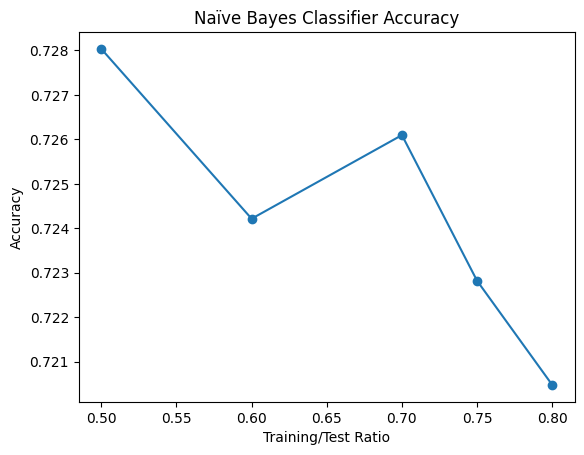

In [19]:
# Plot model accuracy
plt.plot(ratios, accuracies, marker='o')
plt.xlabel('Training/Test Ratio')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Classifier Accuracy')
plt.show()

**Summary**

>As you can see fro our analysis we preformed data cleansing on our data set. We then encoded our dataset as well as made contingency tables to see the ratios of the categories. Using the contingency tables we calculates several probabilities. Lastly we made 2 NB classifiers and kept track of their accuracy on several ratios and plotted it for a visual reference